In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/My Drive/Upwork/")
os.getcwd()

'/content/gdrive/My Drive/Upwork'

## Importing Libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
print(tf.__version__)

1.14.0


In [0]:
!pip install -q tensorflow==2.0.0-beta1

In [34]:
#import tensorflow as tf
print(tf.__version__)

1.14.0


## Image Classification: MNIST Fashion Set

In [0]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
len(train_labels)

60000

In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
len(test_labels)

10000

## Preprocessing Data

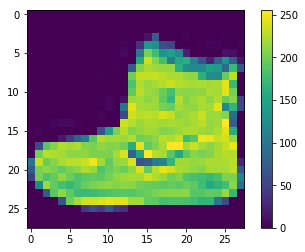

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# scaling images so that rgb values are between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

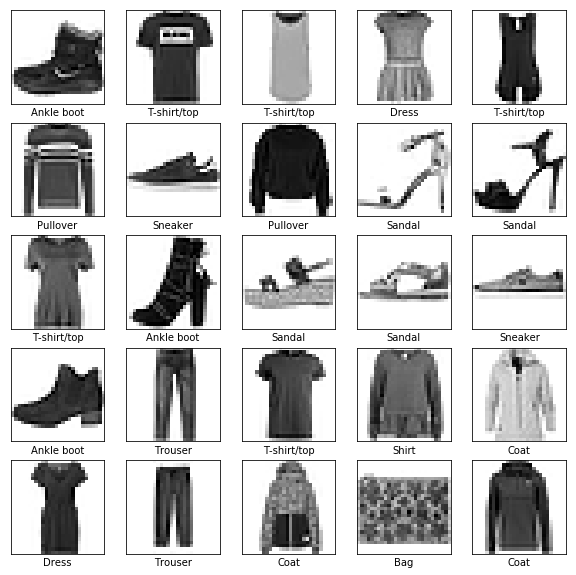

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the Model

### Setting up the Layers

In [0]:
# Flatten 2d matrices into 1d array and establish activation functions
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
#Add loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [48]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5011 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3756 - acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3372 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3131 - acc: 0.8843
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2968 - acc: 0.8902
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2798 - acc: 0.8973
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2690 - acc: 0.8988
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2596 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2510 - acc: 0.9070
Epoch 10/10
60000/60000 [==============================] - 4s 63us/sample - loss: 

### Evaluate Accuracy

In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3410 - acc: 0.8801

Test accuracy: 0.8801


In [0]:
predictions = model.predict(test_images)

In [51]:
predictions[0]

array([6.6552848e-09, 1.1030525e-11, 1.0709928e-11, 8.6021407e-12,
       8.8805113e-10, 1.0701471e-03, 3.2675387e-09, 6.7805205e-03,
       2.2714148e-09, 9.9214935e-01], dtype=float32)

In [52]:
predictions[1:11]

array([[5.79641392e-06, 9.81652433e-12, 9.95535612e-01, 7.71011366e-10,
        1.29333581e-03, 4.67051900e-14, 3.16518289e-03, 2.35681491e-16,
        4.13121484e-08, 2.09288673e-16],
       [1.41571607e-11, 1.00000000e+00, 6.47171336e-12, 1.02761397e-10,
        2.44926475e-12, 2.41046676e-18, 1.06835265e-12, 1.09406076e-17,
        1.00377226e-15, 1.90812836e-21],
       [1.90669786e-10, 9.99999762e-01, 4.11475715e-10, 2.01026594e-07,
        1.88434754e-10, 1.13251415e-13, 2.76248052e-10, 5.13075978e-15,
        1.41796204e-14, 1.07908556e-16],
       [3.53438854e-02, 2.08722454e-07, 8.00793339e-03, 1.75508601e-03,
        6.50607399e-04, 2.72908647e-08, 9.54211950e-01, 9.62460955e-09,
        3.02486933e-05, 6.90859991e-09],
       [6.71624534e-08, 9.99999881e-01, 1.56514146e-09, 4.58196636e-09,
        1.94099270e-09, 1.36057971e-15, 1.09247456e-08, 7.22614978e-16,
        4.77279457e-13, 7.00577179e-17],
       [6.23178630e-06, 3.92668369e-07, 1.66404508e-02, 5.98513143e-05,
   

In [53]:
np.argmax(predictions[0])

9

In [54]:
test_labels[0]

9

### Plotting the Results

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

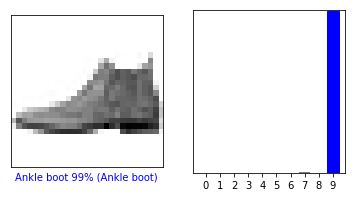

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

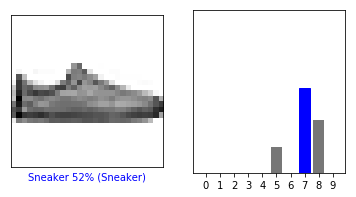

In [58]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

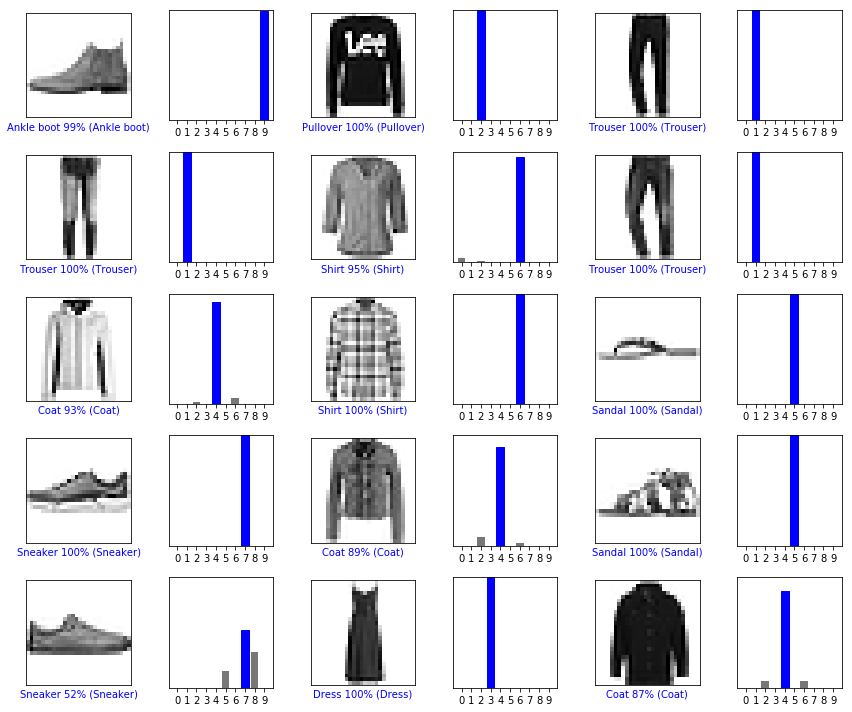

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [60]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [61]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [62]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.7964089e-06 9.8165625e-12 9.9553573e-01 7.7100853e-10 1.2933328e-03
  4.6704926e-14 3.1651743e-03 2.3567972e-16 4.1312230e-08 2.0928708e-16]]


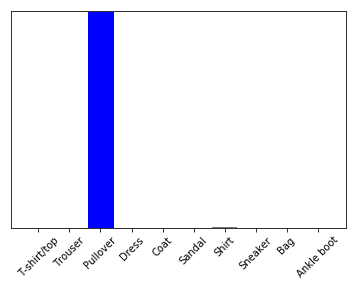

In [63]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [64]:
np.argmax(predictions_single[0])

2